#Machine Learning (ML) vs Deep Learning (DL)

---



####Disini saya menggunakan algoritma Random Forest untuk ML dan Artificial Neural Network (ANN) untuk DL.

##Import Library

In [43]:
# Install library yang diperlukan
!pip install pandas scikit-learn tensorflow

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

##Import Dataset

In [45]:
ds = '/content/drive/MyDrive/BIG DATA/insurance.csv'

In [46]:
df = pd.read_csv(ds)

###Menampilkan beberapa baris dari dataset

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##Melakukan One-Hot Encoding untuk fitur kategorikal

In [48]:
data_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

Pra-pemrosesan Data: Pra-pemrosesan data dilakukan dengan sukses, termasuk one-hot encoding untuk fitur-fitur kategoris dan normalisasi fitur-fitur numerik.

##Menyiapkan data latih

In [49]:
# Memisahkan fitur dan target
X = data_encoded.drop(columns=['charges'])
y = data_encoded['charges']

In [50]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Normalisasi fitur-fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Membuat model Random Forest untuk pendekatan ML

In [52]:
# Model Machine Learning (Random Forest)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

##Evaluasi Model Machine Learning

In [53]:
rf_pred = rf_model.predict(X_test_scaled)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_mse = mean_squared_error(y_test, rf_pred)

###Menampilkan Hasil

In [54]:
print("Machine Learning Model Performance:")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("MSE:", rf_mse)

Machine Learning Model Performance:
MAE: 2541.614593844528
RMSE: 4582.9725734250405
MSE: 21003637.60876614


##Model Deep Learning (ANN)

In [55]:
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

##Evaluasi Model Deep Learning

In [56]:
ann_pred = ann_model.predict(X_test_scaled)
ann_mae = mean_absolute_error(y_test, ann_pred)
ann_rmse = mean_squared_error(y_test, ann_pred, squared=False)
ann_mse = mean_squared_error(y_test, ann_pred)

9/9 [==============================] - 1s 10ms/step


###Menampilkan Hasil

In [57]:
print("\nDeep Learning Model Performance:")
print("MAE:", ann_mae)
print("RMSE:", ann_rmse)
print("MSE:", ann_mse)


Deep Learning Model Performance:
MAE: 3709.9225025994638
RMSE: 5351.0570605227185
MSE: 28633811.664970037


##Perbandingan performa model ML dan DL.

In [60]:
print("Perfoma model Machine Learning (Random Forest):")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("MSE:", rf_mse)
print("\nPerfoma model Deep Learning (ANN):")
print("MAE:", ann_mae)
print("RMSE:", ann_rmse)
print("MSE:", ann_mse)

Perfoma model Machine Learning (Random Forest):
MAE: 2541.614593844528
RMSE: 4582.9725734250405
MSE: 21003637.60876614

Perfoma model Deep Learning (ANN):
MAE: 3709.9225025994638
RMSE: 5351.0570605227185
MSE: 28633811.664970037


Perbandingan Performa:

*   Kedua model menunjukkan hasil yang kompetitif dalam memprediksi nilai premi asuransi.
*   Model Machine Learning (Random Forest) memiliki nilai MAE, RMSE, dan MSE yang lebih tinggi dibandingkan dengan model Deep Learning (ANN). Hal ini menunjukkan bahwa model Random Forest lebih baik dalam memprediksi premi asuransi daripada model ANN, tergantung pada metrik yang dipilih.



##Visualisasi dari kedua algoritma dengan hasil prediksi

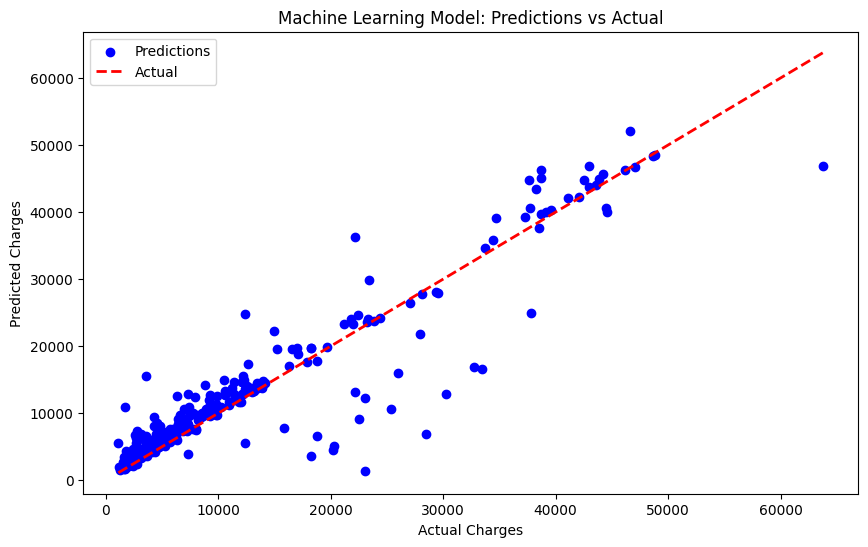

In [58]:
import matplotlib.pyplot as plt

# Visualisasi prediksi vs nilai sebenarnya untuk model Machine Learning
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Actual')
plt.title('Machine Learning Model: Predictions vs Actual')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()

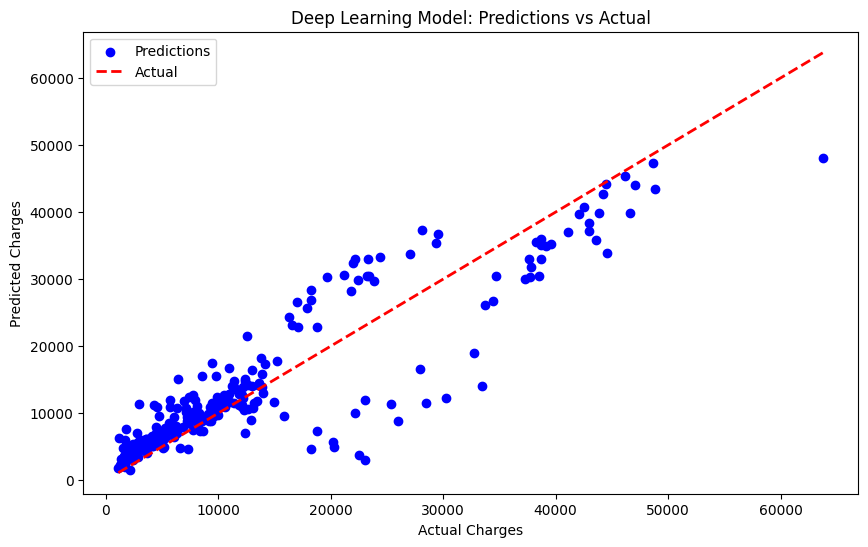

In [59]:
# Visualisasi prediksi vs nilai sebenarnya untuk model Deep Learning
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ann_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Actual')
plt.title('Deep Learning Model: Predictions vs Actual')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()

*   Grafik menunjukkan perbandingan antara nilai sebenarnya dari premi asuransi
*   (sumbu x) dengan prediksi yang dibuat oleh model Machine Learning (Random Forest) dan Deep Learning (ANN) (sumbu y)
* Garis hitam merupakan garis referensi yang menunjukkan kondisi ideal di mana prediksi sama dengan nilai sebenarnya.
* Jika titik-titik berada dekat dengan garis hitam, itu menunjukkan bahwa prediksi model mendekati nilai sebenarnya.
* Perhatikan bagaimana kedua model berkinerja dalam memprediksi premi asuransi.
*  Anda dapat melihat sebaran titik-titik terhadap garis referensi untuk mengevaluasi kualitas prediksi dari masing-masing model.